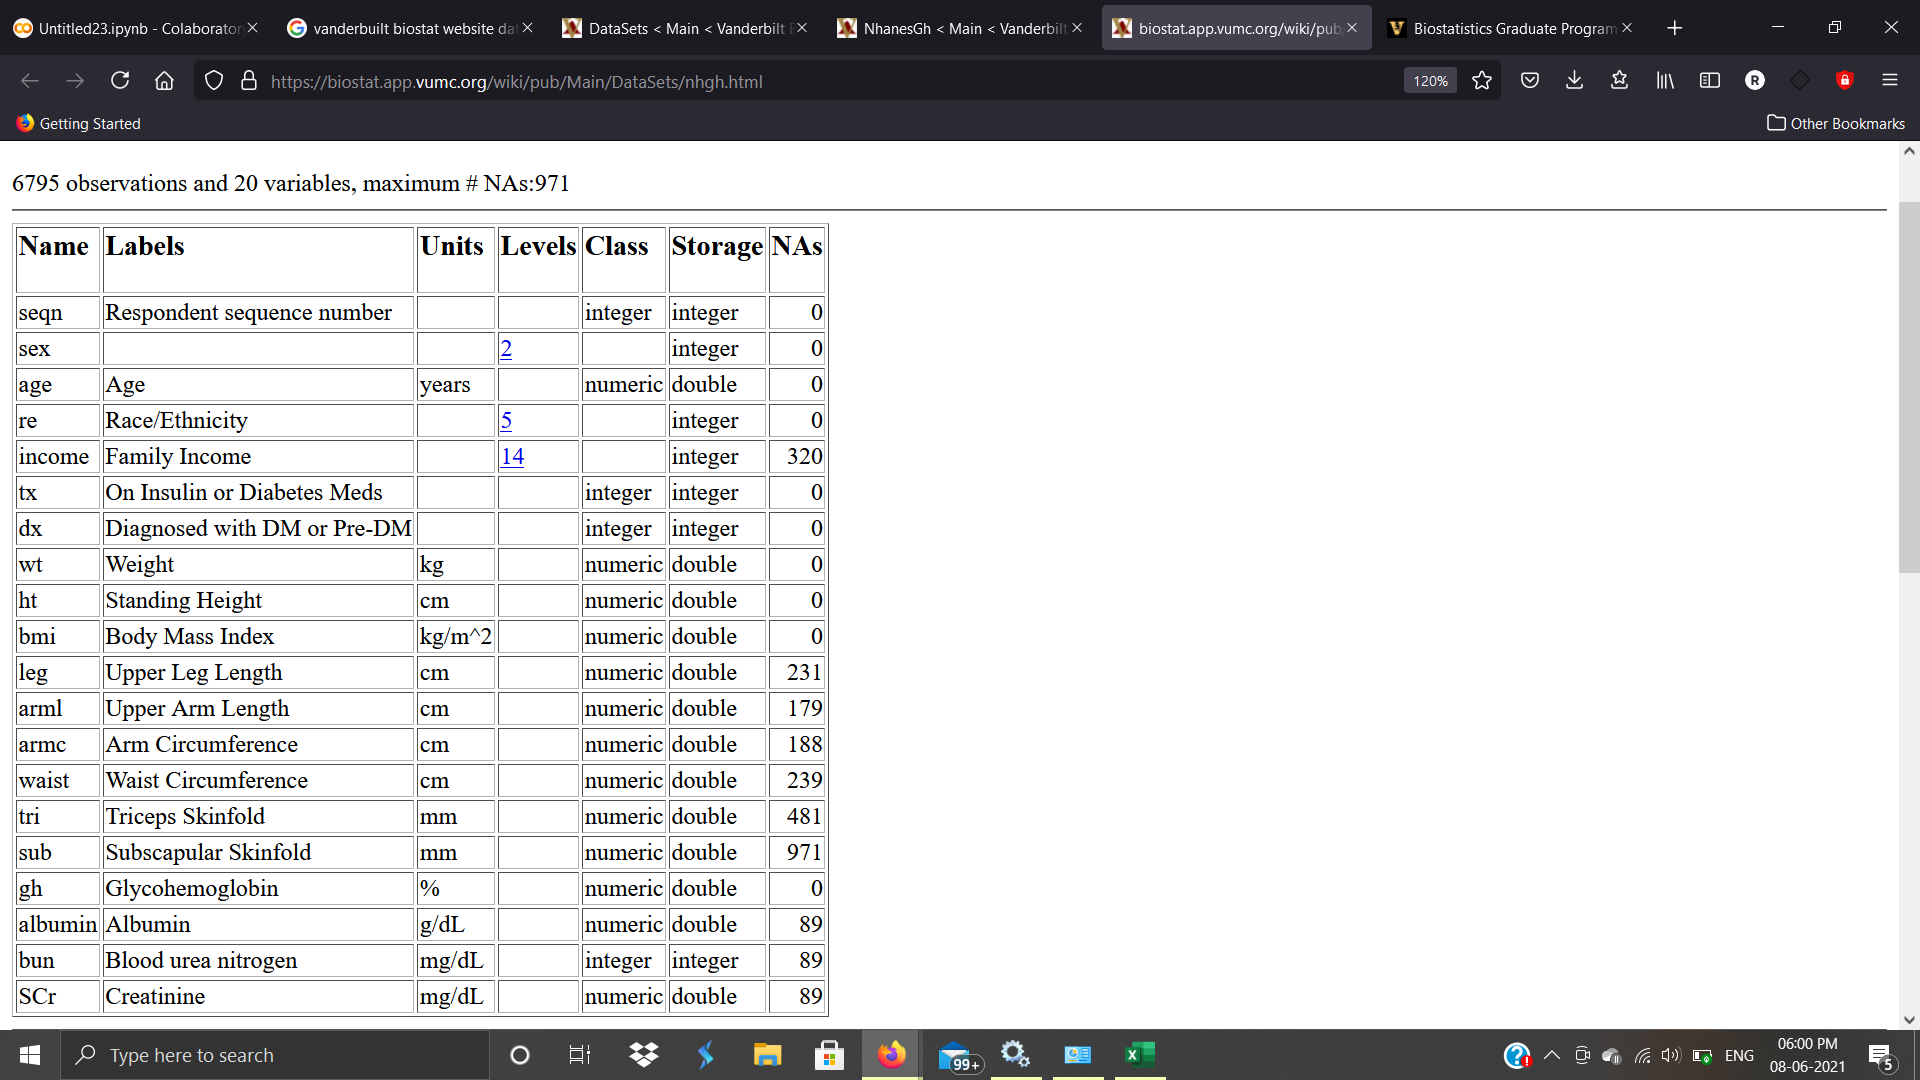

sex

    male
    female

re

    Mexican American
    Other Hispanic
    Non-Hispanic White
    Non-Hispanic Black
    Other Race Including Multi-Racial

income

    [0,5000)
    [5000,10000)
    [10000,15000)
    [15000,20000)
    [20000,25000)
    [25000,35000)
    [35000,45000)
    [45000,55000)
    [55000,65000)
    [65000,75000)
    
    [75000,100000)
    >= 100000



# Import & clean

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm  import SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier 
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import f1_score
from sklearn.ensemble import  ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from warnings import filterwarnings
filterwarnings("ignore")

In [ ]:

data = pd.read_csv("https://raw.githubusercontent.com/roshankumarg529/Project/main/nhgh.tsv", sep = '\t')
data.drop(['seqn'], axis=  1, inplace= True)


data.rename(columns={'re':'Race/Ethnicity','tx':'On_Insulin/Dia_Meds', 'dx':'Diag_DM/Pre_DM','wt': 'Weight(kg)','ht':'Height(cm)','bmi':'BMI',
                     'leg':'Upper_Leg_Length', 'arml':'Upper_Arm_Length','armc':'Arm_Circum','waist':'Waist_Circum', 'tri':'Triceps_Skinfold',
                     'sub':'Subscapular_Skinfold', 'gh':'Glycohemoglobin(%)','bun':'Blood_urea_nitrogen','SCr':'Creatinine'} , inplace = True)

data.head(2)


,sex,age,Race/Ethnicity,income,On_Insulin/Dia_Meds,Diag_DM/Pre_DM,Weight(kg),Height(cm),BMI,Upper_Leg_Length,Upper_Arm_Length,Arm_Circum,Waist_Circum,Triceps_Skinfold,Subscapular_Skinfold,Glycohemoglobin(%),albumin,Blood_urea_nitrogen,Creatinine
0,male,34.166667,Non-Hispanic White,"[25000,35000)",0,0,87.4,164.7,32.22,41.5,40.0,36.4,100.4,16.4,24.9,5.2,4.8,6.0,0.94
1,male,16.833333,Non-Hispanic Black,"[45000,55000)",0,0,72.3,181.3,22.00,42.0,39.5,26.6,74.7,10.2,10.5,5.7,4.6,9.0,0.89


In [ ]:
data['income'].value_counts()

>= 100000         877
[25000,35000)     845
[35000,45000)     610
[75000,100000)    564
[20000,25000)     563
[10000,15000)     531
[45000,55000)     522
[15000,20000)     456
[55000,65000)     376
[5000,10000)      315
[65000,75000)     274
[0,5000)          235
> 20000           232
< 20000            75
Name: income, dtype: int64

In [ ]:
print(50*'-',"\nData Info \n",50*'-')

print(data.info())
print(50*'-',"\n Missing value counts\n",50*'-')
print( data.isnull().sum())

-------------------------------------------------- 
Data Info 
 --------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6795 entries, 0 to 6794
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sex                   6795 non-null   object 
 1   age                   6795 non-null   float64
 2   Race/Ethnicity        6795 non-null   object 
 3   income                6475 non-null   object 
 4   On_Insulin/Dia_Meds   6795 non-null   int64  
 5   Diag_DM/Pre_DM        6795 non-null   int64  
 6   Weight(kg)            6795 non-null   float64
 7   Height(cm)            6795 non-null   float64
 8   BMI                   6795 non-null   float64
 9   Upper_Leg_Length      6564 non-null   float64
 10  Upper_Arm_Length      6616 non-null   float64
 11  Arm_Circum            6607 non-null   float64
 12  Waist_Circum          6556 non-null   float64
 13  Triceps_

In [ ]:

def Encode():

  categ = {'Non-Hispanic White':1,
         'Non-Hispanic Black':2,
         'Mexican American':3,
         'Other Hispanic':4,
         'Other Race Including Multi-Racial':5}


  gen = {'male':1,
        'female':2}


  incm = {'>= 100000':12,
     '[25000,35000)':6,
     '[35000,45000)':7,
     '[75000,100000)':11,
     '[20000,25000)':5,
     '[10000,15000)':3,
     '[45000,55000)':8,
     '[15000,20000)':4,
     '[55000,65000)':9,
     '[5000,10000)':2,
     '[65000,75000)':10,
     '[0,5000)':1,
     '> 20000':5,
     '< 20000':4 } 


  data['income'] = data['income'].map(incm)
  data['sex'] = data['sex'].map(gen)
  data['Race/Ethnicity'] = data['Race/Ethnicity'].map(categ)
  #print(data.head(5))

  return data
  
  
Encode()


data['age'] = round(data['age']) 
data.dropna(inplace = True)
#data.fillna(-1)



      

In [ ]:
data.loc[data['Glycohemoglobin(%)'] < 6.0, 'Diabetes_level'] = 0

data.loc[(data['Glycohemoglobin(%)'] >= 6.0) & (data['Glycohemoglobin(%)'] <= 6.4), 'Diabetes_level'] = 1
data.loc[data['Glycohemoglobin(%)'] >= 6.5, 'Diabetes_level'] = 2

data['Diabetes_level'] = data['Diabetes_level'].astype('int')
data['Diabetes_level'] = data['Diabetes_level'].astype('int')

data.head()

,sex,age,Race/Ethnicity,income,On_Insulin/Dia_Meds,Diag_DM/Pre_DM,Weight(kg),Height(cm),BMI,Upper_Leg_Length,Upper_Arm_Length,Arm_Circum,Waist_Circum,Triceps_Skinfold,Subscapular_Skinfold,Glycohemoglobin(%),albumin,Blood_urea_nitrogen,Creatinine,Diabetes_level
0,1,34.0,1,6.0,0,0,87.4,164.7,32.22,41.5,40.0,36.4,100.4,16.4,24.9,5.2,4.8,6.0,0.94,0
1,1,17.0,2,8.0,0,0,72.3,181.3,22.00,42.0,39.5,26.6,74.7,10.2,10.5,5.7,4.6,9.0,0.89,0
2,2,60.0,2,3.0,1,1,116.8,166.0,42.39,35.3,39.0,42.2,118.2,29.6,35.6,6.0,3.9,10.0,1.11,1
3,1,26.0,3,6.0,0,0,97.6,173.0,32.61,41.7,38.7,37.0,103.7,19.0,23.2,5.1,4.2,8.0,0.80,0
4,2,50.0,1,7.0,0,0,86.7,168.4,30.57,37.5,36.1,33.3,107.8,30.3,28.0,5.3,4.3,13.0,0.79,0


In [ ]:
pd.crosstab(data['Diabetes_level'],data['sex'], rownames=['Diabetes_level'], colnames=['sex'])

sex,1,2
Diabetes_level,,
0,2311,2196
1,222,230
2,209,175


In [ ]:
pd.crosstab(data['Diabetes_level'],data['Race/Ethnicity'], rownames=['Diabetes_level'], colnames=['Race/Ethnicity'])

pd.crosstab(data['Diabetes_level'],data['On_Insulin/Dia_Meds'], rownames=['Diabetes_level'], colnames=['On_Insulin/Dia_Meds'])






On_Insulin/Dia_Meds,0,1
Diabetes_level,,
0,4454,53
1,381,71
2,114,270


In [ ]:
pd.crosstab(data['Diabetes_level'],data['On_Insulin/Dia_Meds'], rownames=['Diabetes_level'], colnames=['On_Insulin/Dia_Meds'])


On_Insulin/Dia_Meds,0,1
Diabetes_level,,
0,4454,53
1,381,71
2,114,270


In [ ]:
cols = ['sex',
 'age',
 'Race/Ethnicity',
 'income',
 'On_Insulin/Dia_Meds',
 'Diag_DM/Pre_DM',
 'Weight(kg)',
 'Height(cm)',
 'BMI',
 'Upper_Leg_Length',
 'Upper_Arm_Length',
 'Arm_Circum',
 'Waist_Circum',
 'Triceps_Skinfold',
 'Subscapular_Skinfold',
 'albumin',
 'Blood_urea_nitrogen',
 'Creatinine']

In [ ]:



for c in cols:
  #print( data[c].describe())
  print(c)
  print("Mean ", data[c].mean())

  print("Variance ", data[c].var())
  print("Standard-deviation ", data[c].std())

  print("Skewness " ,data[c].skew())
  print("Kurtosis ", data[c].kurtosis())
  print("\n-----------------------------------")

sex
Mean  1.4868051656372825
Variance  0.2498726627063839
Standard-deviation  0.4998726464874667
Skewness  0.05281255302015988
Kurtosis  -1.9979588534780497

-----------------------------------
age
Mean  43.48156466404642
Variance  440.1474979631992
Standard-deviation  20.979692513552223
Skewness  0.17837842034808277
Kurtosis  -1.1926024905961992

-----------------------------------
Race/Ethnicity
Mean  2.0802919708029197
Variance  1.5736717979268546
Standard-deviation  1.254460759819475
Skewness  0.8273105927783854
Kurtosis  -0.4890601383664741

-----------------------------------
income
Mean  6.980722440576455
Variance  10.855674730696494
Standard-deviation  3.2947950969212783
Skewness  0.08870723069989667
Kurtosis  -1.0878902045545333

-----------------------------------
On_Insulin/Dia_Meds
Mean  0.07374134381433652
Variance  0.06831634416644032
Standard-deviation  0.261373954644376
Skewness  3.262897975520762
Kurtosis  8.649740843073563

-----------------------------------
Diag_DM/

# EDA

In [ ]:
data.describe(percentiles= [.25,.5,.75,.9,.95,.97,.99])

,sex,age,Race/Ethnicity,income,On_Insulin/Dia_Meds,Diag_DM/Pre_DM,Weight(kg),Height(cm),BMI,Upper_Leg_Length,Upper_Arm_Length,Arm_Circum,Waist_Circum,Triceps_Skinfold,Subscapular_Skinfold,Glycohemoglobin(%),albumin,Blood_urea_nitrogen,Creatinine
count,6795.000000,6795.000000,6795.000000,6475.000000,6795.000000,6795.000000,6795.000000,6795.000000,6795.000000,6564.000000,6616.000000,6607.000000,6556.000000,6314.000000,5824.000000,6795.000000,6706.000000,6706.000000,6706.000000
mean,1.503753,44.283885,2.121854,6.938224,0.091832,0.134511,79.370625,167.042958,28.321741,38.409324,36.874607,32.485152,96.254149,18.787726,19.961556,5.676586,4.273621,12.917686,0.878627
std,0.500023,20.599362,1.255374,3.265875,0.288810,0.341225,21.930903,10.264984,6.950110,3.876902,2.781616,5.297660,17.059193,8.319393,8.369083,0.964700,0.326545,5.717571,0.445238
min,1.000000,12.000000,1.000000,1.000000,0.000000,0.000000,28.000000,123.300000,13.180000,20.400000,24.800000,16.800000,52.000000,2.600000,3.800000,4.000000,2.500000,1.000000,0.140000
25%,1.000000,26.000000,1.000000,5.000000,0.000000,0.000000,64.000000,159.600000,23.430000,36.000000,35.000000,28.850000,83.500000,12.000000,13.000000,5.200000,4.100000,9.000000,0.700000
50%,2.000000,44.000000,2.000000,6.000000,0.000000,0.000000,76.300000,166.600000,27.290000,38.400000,36.800000,32.100000,95.300000,17.900000,19.400000,5.500000,4.300000,12.000000,0.830000
75%,2.000000,61.000000,3.000000,10.000000,0.000000,0.000000,91.100000,174.500000,31.880000,41.000000,38.800000,35.600000,106.900000,25.000000,26.200000,5.800000,4.500000,15.000000,0.980000
90%,2.000000,74.000000,4.000000,12.000000,0.000000,1.000000,107.100000,180.500000,37.226000,43.300000,40.500000,39.300000,118.500000,31.000000,31.800000,6.400000,4.700000,19.000000,1.140000
95%,2.000000,80.000000,5.000000,12.000000,1.000000,1.000000,119.000000,184.200000,41.000000,44.700000,41.600000,41.700000,126.500000,33.800000,35.000000,7.200000,4.800000,22.000000,1.280000
97%,2.000000,80.000000,5.000000,12.000000,1.000000,1.000000,127.818000,186.400000,43.850800,45.511000,42.200000,43.300000,131.100000,35.200000,36.500000,7.900000,4.900000,24.000000,1.398500


 - There are some outliers with Creatinine since there is large difference between 99th percentile and the maximum value

In [ ]:
fig,ax  = plt.subplots(5,3,figsize=(20, 18), sharey=False)
sns.distplot(data['age'],kde = True,ax = ax[0,0])
sns.distplot(data['Weight(kg)'],kde = True,ax = ax[0,1])
sns.distplot(data['Height(cm)'],kde = True,ax = ax[0,2])
sns.distplot(data['BMI'],kde = True,ax = ax[1,0])
sns.distplot(data['Upper_Leg_Length'],kde = True,ax = ax[1,1])
sns.distplot(data['Upper_Arm_Length'],kde = True,ax = ax[1,2])
sns.distplot(data['Arm_Circum'],kde = True,ax = ax[2,0])
 
sns.distplot(data['Waist_Circum'],kde = True,ax = ax[2,1])
sns.distplot(data['Triceps_Skinfold'],kde = True,ax = ax[2,2])
sns.distplot(data['Subscapular_Skinfold'],kde = True,ax = ax[3,0])
sns.distplot(data['Glycohemoglobin(%)'],kde = True,ax = ax[3,1])
sns.distplot(data['albumin'],kde = True,ax = ax[3,2])


sns.distplot(data['Blood_urea_nitrogen'],kde = True,ax = ax[4,0])
sns.distplot(data['Creatinine'],kde = True,ax = ax[4,1])


In [ ]:
data.info()

In [ ]:
data.corr()['Glycohemoglobin(%)']

# Smote

In [ ]:
cols = data.columns.to_list()
cols.remove('Glycohemoglobin(%)')
cols.remove('Diabetes_level')

cols

['sex',
 'age',
 'Race/Ethnicity',
 'income',
 'On_Insulin/Dia_Meds',
 'Diag_DM/Pre_DM',
 'Weight(kg)',
 'Height(cm)',
 'BMI',
 'Upper_Leg_Length',
 'Upper_Arm_Length',
 'Arm_Circum',
 'Waist_Circum',
 'Triceps_Skinfold',
 'Subscapular_Skinfold',
 'albumin',
 'Blood_urea_nitrogen',
 'Creatinine']

In [ ]:
from imblearn.over_sampling import SMOTE,ADASYN

data = data[data['Creatinine'] <2] 
data = data[data['Blood_urea_nitrogen'] <50] 
X = data[cols]
y = data['Diabetes_level']
sm = SMOTE(sampling_strategy= 'not majority' ,k_neighbors=3, random_state=42)
X_res, y_res = sm.fit_resample(X, y)
df = pd.DataFrame(X_res, columns= X.columns)
df['Diabetic_level']  = y_res
df['Diabetic_level'].value_counts()

2    4484
1    4484
0    4484
Name: Diabetic_level, dtype: int64

In [ ]:
df = pd.DataFrame(X_res, columns= X.columns)
df['Diabetes_level']  = y_res
df['Diabetes_level'].value_counts()

2    4484
1    4484
0    4484
Name: Diabetes_level, dtype: int64

In [ ]:
cols

['sex',
 'age',
 'Race/Ethnicity',
 'income',
 'On_Insulin/Dia_Meds',
 'Diag_DM/Pre_DM',
 'Weight(kg)',
 'Height(cm)',
 'BMI',
 'Upper_Leg_Length',
 'Upper_Arm_Length',
 'Arm_Circum',
 'Waist_Circum',
 'Triceps_Skinfold',
 'Subscapular_Skinfold',
 'albumin',
 'Blood_urea_nitrogen',
 'Creatinine']

In [ ]:
df['Race/Ethnicity'] = df['Race/Ethnicity'].astype('int')
df['sex'] = df['sex'].astype('int')
df['income'] = df['income'].astype('int')

df['On_Insulin/Dia_Meds'] = df['On_Insulin/Dia_Meds'].astype('int')

df['Diag_DM/Pre_DM'] = df['Diag_DM/Pre_DM'].astype('int')



In [ ]:
data['Blood_urea_nitrogen'].describe(percentiles= [0.99]) 

count    5307.000000
mean       12.639910
std         4.843593
min         1.000000
50%        12.000000
99%        28.000000
max        46.000000
Name: Blood_urea_nitrogen, dtype: float64

In [ ]:
data[data['Blood_urea_nitrogen'] < 50].describe(percentiles= [0.01,0.1,0.25,0.95,0.99,0])['Blood_urea_nitrogen']


count    5307.000000
mean       12.639910
std         4.843593
min         1.000000
0%          1.000000
1%          5.000000
10%         8.000000
25%         9.000000
50%        12.000000
95%        21.000000
99%        28.000000
max        46.000000
Name: Blood_urea_nitrogen, dtype: float64

In [ ]:
data[data['Creatinine'] > 2]

,sex,age,Race/Ethnicity,income,On_Insulin/Dia_Meds,Diag_DM/Pre_DM,Weight(kg),Height(cm),BMI,Upper_Leg_Length,Upper_Arm_Length,Arm_Circum,Waist_Circum,Triceps_Skinfold,Subscapular_Skinfold,Glycohemoglobin(%),albumin,Blood_urea_nitrogen,Creatinine,Diabetes_level


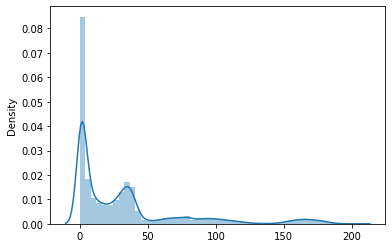

In [ ]:
sns.distplot(df[df['Creatinine']<2])

In [ ]:
df[df['Blood_urea_nitrogen']>32]

,sex,age,Race/Ethnicity,income,On_Insulin/Dia_Meds,Diag_DM/Pre_DM,Weight(kg),Height(cm),BMI,Upper_Leg_Length,Upper_Arm_Length,Arm_Circum,Waist_Circum,Triceps_Skinfold,Subscapular_Skinfold,albumin,Blood_urea_nitrogen,Creatinine,Diabetes_level
49,1,80.000000,1,5,0,0,105.200000,171.500000,35.770000,42.600000,40.000000,35.300000,130.800000,24.400000,27.600000,4.200000,34.000000,1.090000,0
102,1,80.000000,1,10,0,0,51.400000,169.600000,17.870000,37.200000,38.200000,23.700000,75.000000,4.600000,6.000000,3.700000,38.000000,1.520000,0
298,2,74.000000,1,5,1,1,117.000000,159.800000,45.820000,39.200000,39.000000,44.200000,130.100000,33.000000,30.200000,4.000000,38.000000,1.620000,2
493,1,80.000000,1,7,1,1,88.300000,181.900000,26.690000,40.000000,41.000000,29.300000,100.700000,13.200000,9.800000,4.100000,43.000000,1.550000,1
810,2,68.000000,1,7,0,0,77.500000,158.000000,31.040000,35.000000,36.000000,33.100000,107.000000,29.600000,24.600000,3.900000,46.000000,1.660000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12680,2,74.853785,1,3,0,0,110.926339,161.118113,42.897853,32.071345,36.355548,41.049706,135.025751,36.808780,35.322226,3.850294,33.292429,1.200643,2
12850,2,70.805891,2,5,1,1,89.407099,157.517674,36.032946,32.878852,37.505891,40.504154,113.146450,34.054079,35.569486,4.241767,38.447129,1.720242,2
13042,1,72.215526,1,5,1,1,90.907763,163.752194,33.972442,35.323288,37.396119,37.896528,116.346577,31.255159,32.094793,4.239224,35.137898,1.373790,2
13168,1,79.988440,1,3,1,1,84.390495,167.387541,30.121079,40.192422,38.398459,34.200771,104.203596,21.995890,19.397945,4.499486,42.978165,1.739974,2


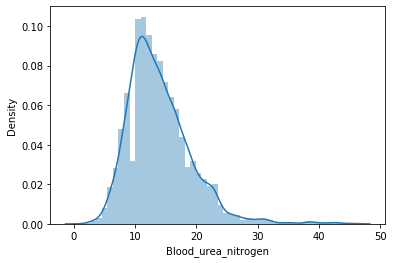

In [ ]:
sns.distplot(df['Blood_urea_nitrogen'])


# pycaret

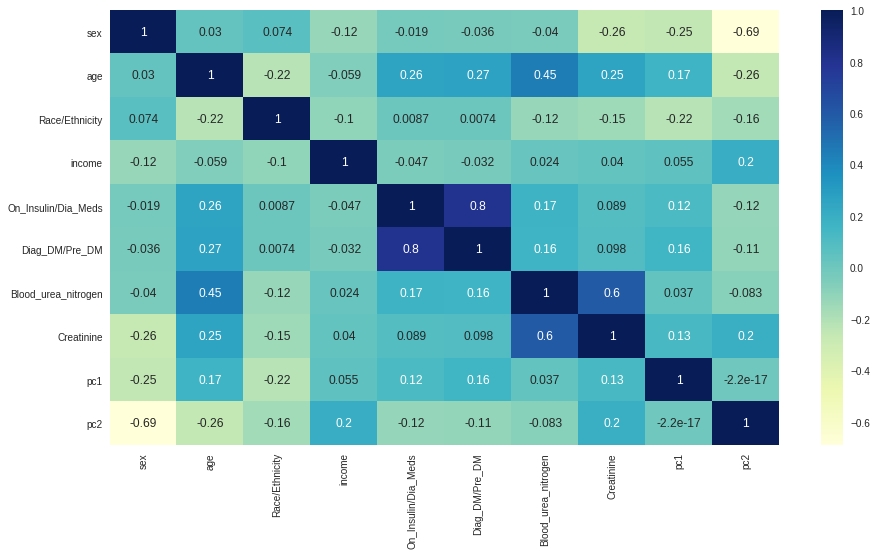

In [ ]:
plt.figure(figsize= (15,8))
sns.heatmap(X.corr(), cmap="YlGnBu", annot=True)

In [ ]:
!pip install pycaret


In [ ]:
cols = data.columns.to_list()
cols.remove('Glycohemoglobin(%)')
#cols.remove('Diabetes_level')


In [ ]:
from pycaret.classification import *

setup(df[cols], target = 'Diabetes_level',remove_multicollinearity = True)

In [ ]:
compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9288,0.9894,0.9289,0.9306,0.9285,0.8932,0.8943,2.149
knn,K Neighbors Classifier,0.8761,0.9630,0.8767,0.8916,0.8692,0.8142,0.8259,0.163
dt,Decision Tree Classifier,0.8505,0.8879,0.8505,0.8512,0.8498,0.7758,0.7767,0.165
ada,Ada Boost Classifier,0.7349,0.8818,0.7351,0.7537,0.7381,0.6026,0.6083,0.752
ridge,Ridge Classifier,0.7102,0.0000,0.7103,0.7332,0.7140,0.5656,0.5718,0.026
lr,Logistic Regression,0.7094,0.8668,0.7096,0.7307,0.7131,0.5645,0.5702,3.836
nb,Naive Bayes,0.6868,0.8449,0.6873,0.7210,0.6918,0.5308,0.5416,0.027
svm,SVM - Linear Kernel,0.6231,0.0000,0.6230,0.7281,0.6014,0.4349,0.4838,0.407
qda,Quadratic Discriminant Analysis,0.6039,0.7743,0.6049,0.6513,0.5822,0.4070,0.4314,0.035


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=5867, verbose=0,
                       warm_start=False)

In [ ]:
data['Diabetes_level'].value_counts()

0.0    4507
1.0     452
2.0     384
Name: Diabetes_level, dtype: int64

In [ ]:
lg=create_model('lightgbm') 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9324,0.9907,0.9325,0.9327,0.9324,0.8986,0.8987
1,0.9514,0.9919,0.9516,0.9517,0.9514,0.9271,0.9273
2,0.9451,0.9932,0.9451,0.9453,0.9451,0.9176,0.9177
3,0.9504,0.9913,0.9505,0.9504,0.9503,0.9256,0.9257
4,0.9397,0.9886,0.9398,0.9400,0.9397,0.9096,0.9098
5,0.9450,0.9904,0.9451,0.9452,0.9451,0.9175,0.9176
6,0.9376,0.9888,0.9377,0.9378,0.9377,0.9064,0.9065
7,0.9218,0.9852,0.9220,0.9222,0.9216,0.8827,0.8831
8,0.9355,0.9905,0.9357,0.9358,0.9354,0.9033,0.9035
9,0.9323,0.9901,0.9325,0.9324,0.9323,0.8985,0.8986


In [ ]:
pred_holdout = predict_model(lg)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9394,0.9912,0.9392,0.9395,0.9394,0.909,0.9091


In [ ]:
plot_model(lg, plot = 'confusion_matrix')


# MAnual

In [ ]:
df.columns

Index(['sex', 'age', 'Race/Ethnicity', 'income', 'On_Insulin/Dia_Meds',
       'Diag_DM/Pre_DM', 'Weight(kg)', 'Height(cm)', 'BMI', 'Upper_Leg_Length',
       'Upper_Arm_Length', 'Arm_Circum', 'Waist_Circum', 'Triceps_Skinfold',
       'Subscapular_Skinfold', 'albumin', 'Blood_urea_nitrogen', 'Creatinine',
       'Diabetes_level'],
      dtype='object')

In [ ]:
df.head(2)

,sex,age,Race/Ethnicity,income,On_Insulin/Dia_Meds,Diag_DM/Pre_DM,Weight(kg),Height(cm),BMI,Upper_Leg_Length,Upper_Arm_Length,Arm_Circum,Waist_Circum,Triceps_Skinfold,Subscapular_Skinfold,albumin,Blood_urea_nitrogen,Creatinine,Diabetes_level
0,1,34.0,1,6.0,0,0,87.4,164.7,32.22,41.5,40.0,36.4,100.4,16.4,24.9,4.8,6.0,0.94,0
1,1,17.0,2,8.0,0,0,72.3,181.3,22.00,42.0,39.5,26.6,74.7,10.2,10.5,4.6,9.0,0.89,0


In [ ]:
X.shape[1]

6

In [ ]:
col = [ 'Upper_Leg_Length','Upper_Arm_Length']
col1 = ['Arm_Circum', 'Waist_Circum']
col2 = ['Triceps_Skinfold','Subscapular_Skinfold']
col3 = ['Weight(kg)', 'Height(cm)']
col4 = [ 'Blood_urea_nitrogen', 'Creatinine', 'albumin']
#, 'albumin']

In [ ]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 2)
 
X_train = pca.fit_transform(df[col4])

 
explained_variance = pca.explained_variance_ratio_
df1 = pd.DataFrame(X_train, columns = ['pc1','pc2'])
explained_variance

array([0.99603332, 0.00202438])

In [ ]:
#df['pc1'] = df1['pc1']

df['pc5'] = df1['pc1']

#df['pc2'] = df1['pc2']


In [ ]:
cols = ['On_Insulin/Dia_Meds', 
  'Diag_DM/Pre_DM',
  'Weight(kg)',
 'Height(cm)',
 'BMI',
 'Upper_Leg_Length',
 'Upper_Arm_Length',
 'Arm_Circum',
 'Waist_Circum',
 'Triceps_Skinfold',
 'Subscapular_Skinfold',
 'albumin',
 'Blood_urea_nitrogen',
 'Creatinine']

# Models

# ANN

In [ ]:
len(cols)

18

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

X = df[cols]
y = df['Diabetes_level']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25,shuffle = True,stratify=y, random_state=42)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import ReLU
from keras.layers import Dropout


# Initialising the ANN
classifier = Sequential()

classifier.add(Dense(units = 128, kernel_initializer = 'he_uniform', activation = 'relu', input_dim = 18))
classifier.add(Dropout(0.3))
# Adding the second hidden layer
classifier.add(Dense(units = 64,kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 3, kernel_initializer = 'uniform', activation = 'softmax'))

# Compiling the ANN | means applying SGD on the whole ANN
classifier.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy' , metrics = ['SparseCategoricalAccuracy'])

# Fitting the ANN to the Training set
history=classifier.fit(X_train, y_train,validation_split=0.3,validation_data=(X_test,y_test), batch_size = 100, epochs = 150)



Epoch 1/150
71/71 [==============================] - 1s 5ms/step - loss: 0.8165 - sparse_categorical_accuracy: 0.6355 - val_loss: 0.7049 - val_sparse_categorical_accuracy: 0.6917
Epoch 2/150
71/71 [==============================] - 0s 3ms/step - loss: 0.6994 - sparse_categorical_accuracy: 0.7065 - val_loss: 0.6871 - val_sparse_categorical_accuracy: 0.6959
Epoch 3/150
71/71 [==============================] - 0s 3ms/step - loss: 0.6782 - sparse_categorical_accuracy: 0.7133 - val_loss: 0.6710 - val_sparse_categorical_accuracy: 0.7127
Epoch 4/150
71/71 [==============================] - 0s 3ms/step - loss: 0.6697 - sparse_categorical_accuracy: 0.7171 - val_loss: 0.6626 - val_sparse_categorical_accuracy: 0.7101
Epoch 5/150
71/71 [==============================] - 0s 3ms/step - loss: 0.6522 - sparse_categorical_accuracy: 0.7251 - val_loss: 0.6458 - val_sparse_categorical_accuracy: 0.7209
Epoch 6/150
71/71 [==============================] - 0s 3ms/step - loss: 0.6477 - sparse_categorical_accu

In [ ]:
score = classifier.evaluate(X_test, y_test)
score


106/106 [==============================] - 0s 954us/step - loss: 0.2950 - sparse_categorical_accuracy: 0.9030


[0.2950073480606079, 0.9029873013496399]

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = classifier.predict(X_test)
y_pred
pred = np.argmax(y_pred, axis = 1) [:]
pred
confusion_matrix(y_test, pred)

array([[ 931,  152,   44],
       [  55, 1061,   11],
       [  27,   39, 1061]])

In [ ]:
model_history.history['accuracy']

[0.5588105320930481,
 0.6927719712257385,
 0.707493007183075,
 0.7139702439308167,
 0.7172088623046875]

In [ ]:
model_history.history['val_loss']

[0.7659435272216797,
 0.6978445649147034,
 0.6842182874679565,
 0.6776789426803589,
 0.6735746264457703]

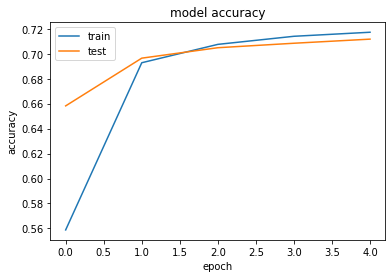

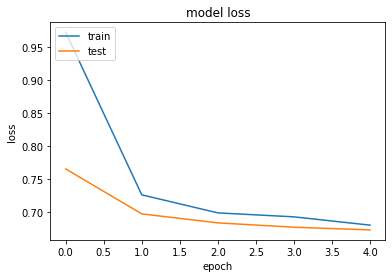

In [ ]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Models

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


dt = DecisionTreeClassifier( random_state= 42)

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(1000, 300, 300), solver='adam', shuffle=False, tol = 0.0001)
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC

#bagging1 = BaggingClassifier(base_estimator= KNeighborsClassifier(), max_samples = 0.5, max_features = 0.5, 
 #                           bootstrap = False, bootstrap_features = False)
#indexes_of_categories = [2,3,4,5,6,7,10,11,12,13]
#bagging = BaggingClassifier(base_estimator= DecisionTreeClassifier(), max_samples = 0.5, max_features = 0.5, 
#                          bootstrap = False, bootstrap_features = False)

#lgbm = LGBMRegressor(boosting_type='gbdt',**parm,  objective='regression', num_boost_round=2000,n_jobs = -1)
#class_weight=  {0:0.39516307965387176, 1:3.940265486725664, 2:4.638020833333333}
svc1 = SVC()   
svc2 = SVC(kernel='linear')  
knn =  KNeighborsClassifier(n_neighbors = 3)


rf  = RandomForestClassifier(n_estimators= 200,max_features= 0.7, max_samples= 0.8, max_depth=15,bootstrap= True, random_state= 42)
et = ExtraTreesClassifier(n_estimators= 200,max_features= 0.7, max_samples= 0.8, max_depth=15,bootstrap= True, random_state= 42)
xgb = XGBClassifier(objective="multi:softmax")
ad = AdaBoostClassifier()
gb = GaussianNB()
gbc = GradientBoostingClassifier()

#lgb = LGBMClassifier(n_estimators = 1000,num_boost_round=2000,objective= 'multiclass',  class_weight=  {0:0.39516, 1:3.9402654, 2:4.6380},
  #                 max_depth= 15,num_leaves = 32,colsample_bytree= 1,reg_alpha= 1,reg_lambda=1.1, random_state = 42, n_jobs= -1)
#lgb = LGBMClassifier(n_estimators = 1000, class_weight=  {0:0.39516307965387176, 1:3.940265486725664, 2:4.638020833333333})

lgb = LGBMClassifier(objective= 'multiclass',num_class =3, random_state= 42)

In [ ]:
X = df[cols]
y = df['Diabetes_level']

model = dt
        
fold = StratifiedKFold(n_splits = 5, shuffle=True, random_state= 42)
pred = [];score_train =[];score_test =[]
i = 1

for train_index , test_index in fold.split(X,y):
    print("fold"+ str(i))
    X_train,X_test = X.iloc[train_index], X.iloc[test_index]
    y_train,y_test = y.iloc[train_index], y.iloc[test_index]
    #model.fit(X_train, y_train, eval_set = [(X_test, y_test)] , early_stopping_rounds = 100, verbose = False )
    model.fit(X_train, y_train )


    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)


    score_test.append(f1_score( y_test,y_pred, average= 'weighted'))
    print("test_score : " + str(f1_score( y_test,y_pred, average= 'weighted')))
    print("train_score : " + str(f1_score(  y_train,y_pred_train, average= 'weighted')))

    score_train.append(f1_score( y_train,y_pred_train, average= 'weighted'))
    i = i+1
print('Test F1 :',np.mean(score_test))
print('Train F1 :',np.mean(score_train))

fold1
test_score : 0.8758624389486913
train_score : 1.0
fold2
test_score : 0.8658203847347935
train_score : 1.0
fold3
test_score : 0.8494905911891774
train_score : 1.0
fold4
test_score : 0.8792592339796516
train_score : 1.0
fold5
test_score : 0.8594437366790413
train_score : 1.0
Test F1 : 0.865975277106271
Train F1 : 1.0


In [ ]:
X = df[cols]
y = df['Diabetes_level']

model = lgb
        
fold = StratifiedKFold(n_splits = 5, shuffle=True, random_state= 42)
pred = [];score_train =[];score_test =[]
i = 1

for train_index , test_index in fold.split(X,y):
    print("fold"+ str(i))
    X_train,X_test = X.iloc[train_index], X.iloc[test_index]
    y_train,y_test = y.iloc[train_index], y.iloc[test_index]
    #model.fit(X_train, y_train, eval_set = [(X_test, y_test)] , early_stopping_rounds = 100, verbose = False )
    model.fit(X_train, y_train )


    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    score_test.append(f1_score( y_test,y_pred, average= 'weighted'))
    print("test_score : " + str(f1_score( y_test,y_pred, average= 'weighted')))
    print("train_score : " + str(f1_score(  y_train,y_pred_train, average= 'weighted')))

    score_train.append(f1_score( y_train,y_pred_train, average= 'weighted'))
    i = i+1
print('Test F1 :',np.mean(score_test))
print('Train F1 :',np.mean(score_train))

fold1
test_score : 0.9409162191984872
train_score : 0.9777840161432486
fold2
test_score : 0.9314856371708636
train_score : 0.9804830837685057
fold3
test_score : 0.9205787313329858
train_score : 0.9784364194105386
fold4
test_score : 0.9419891729817197
train_score : 0.9764794636149424
fold5
test_score : 0.928410716089192
train_score : 0.977504391897565
Test F1 : 0.9326760953546497
Train F1 : 0.97813747496696


In [ ]:
X = df[cols]
y = df['Diabetes_level']

model = knn
        
fold = StratifiedKFold(n_splits = 5, shuffle=True, random_state= 42)
pred = [];score_train =[];score_test =[]
i = 1

for train_index , test_index in fold.split(X,y):
    print("fold"+ str(i))
    X_train,X_test = X.iloc[train_index], X.iloc[test_index]
    y_train,y_test = y.iloc[train_index], y.iloc[test_index]
    #model.fit(X_train, y_train, eval_set = [(X_test, y_test)] , early_stopping_rounds = 100, verbose = False )
    model.fit(X_train, y_train )


    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    score_test.append(f1_score( y_test,y_pred, average= 'weighted'))
    print("test_score : " + str(f1_score( y_test,y_pred, average= 'weighted')))
    print("train_score : " + str(f1_score(  y_train,y_pred_train, average= 'weighted')))

    score_train.append(f1_score( y_train,y_pred_train, average= 'weighted'))
    i = i+1
print('Test F1 :',np.mean(score_test))
print('Train F1 :',np.mean(score_train))

fold1
test_score : 0.8857965116753975
train_score : 0.9333804487947053
fold2
test_score : 0.895476199117172
train_score : 0.9327536508481423
fold3
test_score : 0.8811973622400285
train_score : 0.9347537966323028
fold4
test_score : 0.9060897234529064
train_score : 0.9313676756121605
fold5
test_score : 0.8914890751175756
train_score : 0.9353354218291587
Test F1 : 0.892009774320616
Train F1 : 0.9335181987432939


In [ ]:
X = df[cols]
y = df['Diabetes_level']

model = et
        
fold = StratifiedKFold(n_splits = 5, shuffle=True, random_state= 42)
pred = [];score_train =[];score_test =[]
i = 1

for train_index , test_index in fold.split(X,y):
    print("fold"+ str(i))
    X_train,X_test = X.iloc[train_index], X.iloc[test_index]
    y_train,y_test = y.iloc[train_index], y.iloc[test_index]
    #model.fit(X_train, y_train, eval_set = [(X_test, y_test)] , early_stopping_rounds = 100, verbose = False )
    model.fit(X_train, y_train )


    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    score_test.append(f1_score( y_test,y_pred, average= 'weighted'))
    print("test_score : " + str(f1_score( y_test,y_pred, average= 'weighted')))
    print("train_score : " + str(f1_score(  y_train,y_pred_train, average= 'weighted')))

    score_train.append(f1_score( y_train,y_pred_train, average= 'weighted'))
    i = i+1
print('Test F1 :',np.mean(score_test))
print('Train F1 :',np.mean(score_train))

fold1
test_score : 0.9166325371704668
train_score : 0.9781080649874262
fold2
test_score : 0.9168529664622078
train_score : 0.975734906642573
fold3
test_score : 0.9040237205850188
train_score : 0.9805220440782118
fold4
test_score : 0.9121184161450283
train_score : 0.9757383248481185
fold5
test_score : 0.9052406174037788
train_score : 0.9772976880696763
Test F1 : 0.9109736515533001
Train F1 : 0.977480205725201


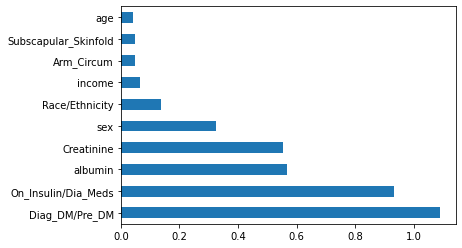

In [ ]:
pd.Series(abs(model.coef_[0]), index=X.columns).nlargest(10).plot(kind='barh')

In [ ]:
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()


f_importances(model.coef_, X.columns)

In [ ]:
imp = round(pd.Series(model.feature_importances_),3)

plt.figure(figsize = (18,10))
plt.bar(X.columns, imp)
plt.title("feature importances")
plt.xticks(rotation = 90)
plt.show()

In [ ]:
df.head(1)

,sex,age,Race/Ethnicity,income,On_Insulin/Dia_Meds,Diag_DM/Pre_DM,Weight(kg),Height(cm),BMI,Upper_Leg_Length,Upper_Arm_Length,Arm_Circum,Waist_Circum,Triceps_Skinfold,Subscapular_Skinfold,albumin,Blood_urea_nitrogen,Creatinine,Diabetes_level
13520,2,68.0819,2,3,1,1,65.73003,157.22457,26.593686,33.9546,34.99454,29.85359,94.106825,22.21638,24.01638,4.295905,19.877149,0.732457,2


In [ ]:
dt = DecisionTreeClassifier( max_leaf_nodes=7, random_state= 42)


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

X = df[cols]
y = df['Diabetes_level']

model = lgb

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25,shuffle = True,stratify=y, random_state=42)


model.fit(X_train,y_train) 
#model.fit(X_train, y_train, eval_set = [(X_test, y_test)] , early_stopping_rounds = 100,categorical_feature = [0,2,3,4,5], verbose = False )

y_pred = model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(confusion_matrix(y_train,model.predict(X_train)))
m = confusion_matrix(y_test,y_pred)

print(f1_score(y_train, model.predict(X_train), average = 'weighted'))
f1_score(y_test, y_pred, average = 'weighted')




[[1043   50   28]
 [  61 1022   38]
 [  15   42 1064]]
[[3309   24   30]
 [  80 3257   26]
 [  19   46 3298]]
0.9776939055088593


0.9303830019535604

In [ ]:
lgb = model.fit(X,y) 


In [ ]:
import pickle 


pk_out = open("lgb.pkl","wb")
# Save the trained model as a pickle string.
pickle.dump(model, pk_out)
pk_out.close()


In [ ]:

from sklearn.externals import joblib
 
# Save the model as a pickle in a file
joblib.dump(model, 'lgb.pkl')

['lgb.pkl']

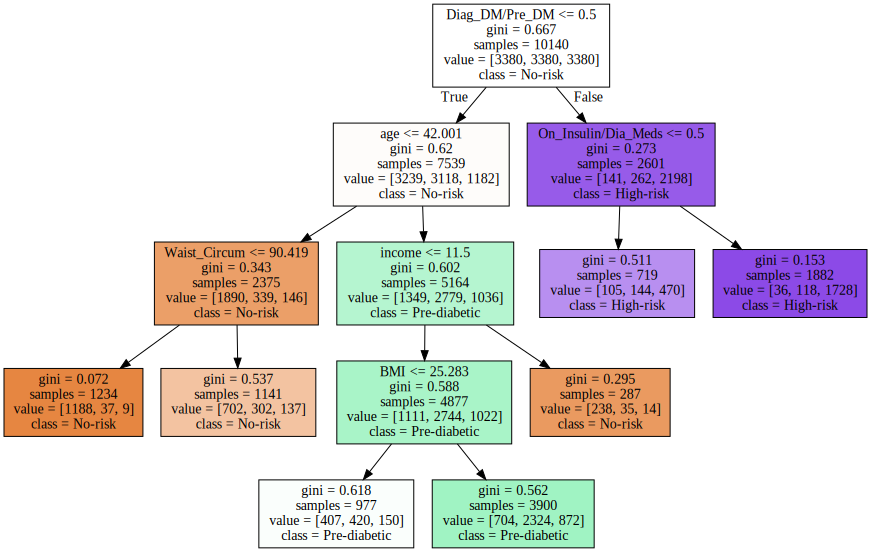

In [ ]:
import graphviz
from sklearn import tree
# DOT data
dot_data = tree.export_graphviz(model, out_file=None, 
                                feature_names=X.columns,  
                                class_names=names,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph


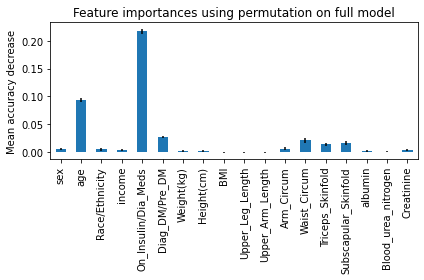

In [ ]:
#svc2
result = permutation_importance(model, X_test, y_test, n_repeats=5,
                                random_state=42, n_jobs=-1)
sorted_idx = result.importances_mean.argsort()

forest_importances = pd.Series(result.importances_mean, index=cols)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

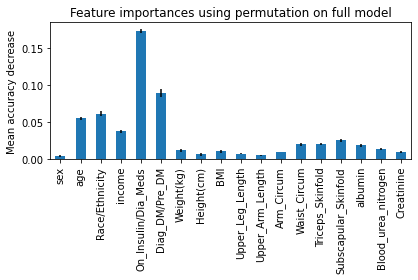

In [ ]:
from sklearn.inspection import permutation_importance

#lgb
result = permutation_importance(model, X_test, y_test, n_repeats=5,
                                random_state=42, n_jobs=-1)
sorted_idx = result.importances_mean.argsort()

forest_importances = pd.Series(result.importances_mean, index=cols)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

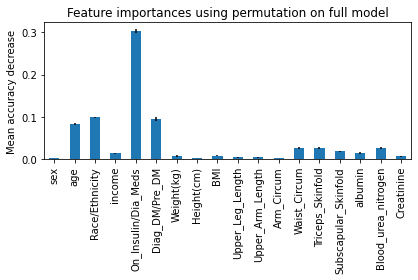

In [ ]:
from sklearn.inspection import permutation_importance

#rf
result = permutation_importance(model, X_test, y_test, n_repeats=5,
                                random_state=42, n_jobs=-1)
sorted_idx = result.importances_mean.argsort()

forest_importances = pd.Series(result.importances_mean, index=cols)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

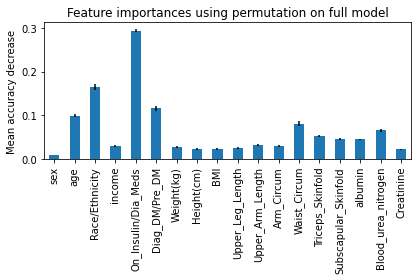

In [ ]:
forest_importances = pd.Series(result.importances_mean, index=cols)
#dt
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [ ]:
!pip install dalex

In [ ]:
import dalex as dx

light = dx.Explainer(model, X, y, 
                  label = "lgb Pipeline")

mp_rf = light.model_parts()
mp_rf.plot()



Preparation of a new explainer is initiated

  -> data              : 13521 rows 18 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 13521 values
  -> model_class       : lightgbm.sklearn.LGBMClassifier (default)
  -> label             : lgb Pipeline
  -> predict function  : <function yhat_proba_default at 0x7fe0dc1774d0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.000572, mean = 0.334, max = 0.995
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.764, mean = 0.666, max = 2.0
  -> model_info        : package lightgbm

A new explainer has been created!


In [ ]:
pd_rf = light.model_profile(variables = 'BMI')
pd_rf.plot()

Calculating ceteris paribus: 100%|██████████| 1/1 [00:00<00:00,  3.48it/s]


In [ ]:
pd_rf = light.model_profile(variables = 'age',label = 0)
pd_rf.plot()

Calculating ceteris paribus: 100%|██████████| 1/1 [00:00<00:00,  3.56it/s]


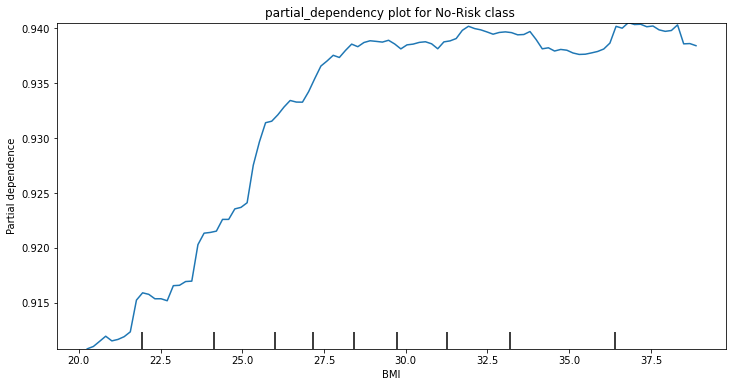

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("partial_dependency plot for No-Risk class ")


tree_disp = plot_partial_dependence(model, X, ["BMI"], ax=ax, target = 1)


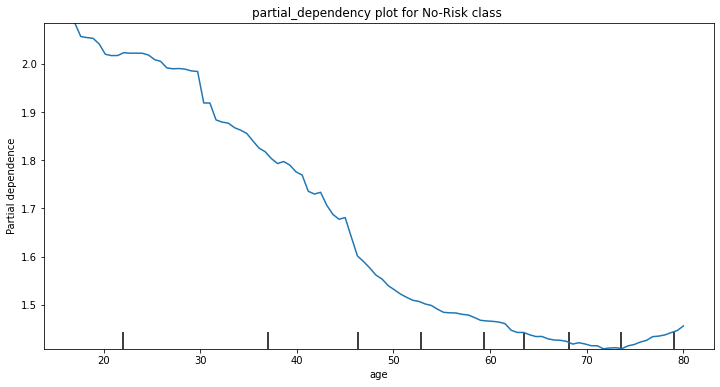

In [ ]:
from sklearn.inspection import plot_partial_dependence

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("partial_dependency plot for No-Risk class ")


tree_disp = plot_partial_dependence(model, X, ["age"], ax=ax, target = 0)



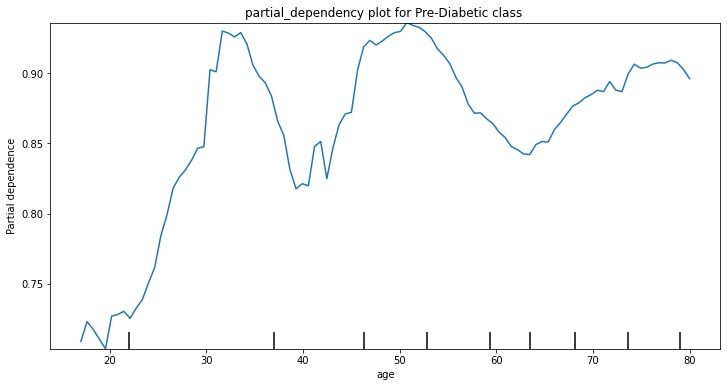

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("partial_dependency plot for Pre-Diabetic class ")


tree_disp = plot_partial_dependence(model, X, ["age"], ax=ax, target = 1)

In [ ]:
X.columns

Index(['sex', 'age', 'Race/Ethnicity', 'income', 'On_Insulin/Dia_Meds',
       'Diag_DM/Pre_DM', 'Weight(kg)', 'Height(cm)', 'BMI', 'Upper_Leg_Length',
       'Upper_Arm_Length', 'Arm_Circum', 'Waist_Circum', 'Triceps_Skinfold',
       'Subscapular_Skinfold', 'albumin', 'Blood_urea_nitrogen', 'Creatinine'],
      dtype='object')

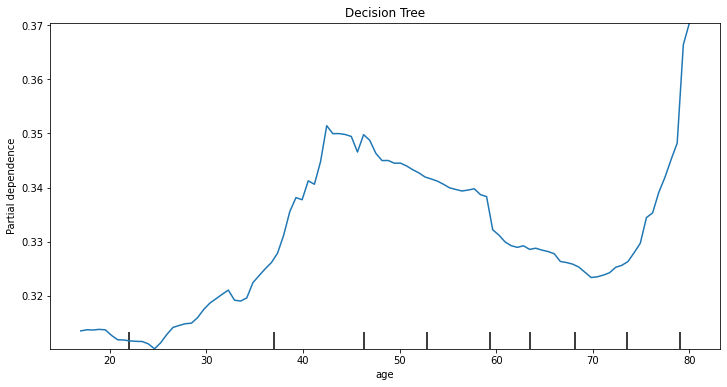

In [ ]:
from sklearn.inspection import plot_partial_dependence

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Decision Tree")
lgb = LGBMClassifier(objective= 'multiclass',num_class =3, random_state= 42)
m  = rf.fit(X,y)
#tree_disp = plot_partial_dependence(m, X, ['Blood_urea_nitrogen'], ax=ax, target = 2)
tree_disp = plot_partial_dependence(m, X, ["age"], ax=ax, target = 2)




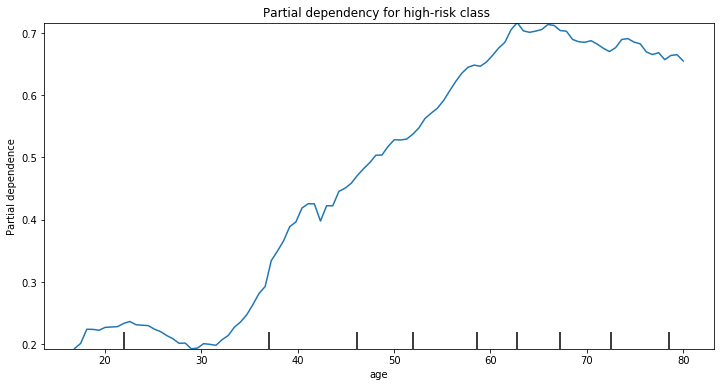

In [ ]:
from sklearn.inspection import plot_partial_dependence

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title( "Partial dependency for high-risk class ")
tree_disp = plot_partial_dependence(model, X_test, ["age"], ax=ax, target = 2)



In [ ]:
!pip install shap

     |████████████████████████████████| 356 kB 8.0 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491649 sha256=752c39beb5b9a6b0d0377704b7975a29ab5d5e42e7ddcd2cf1a8d37430f8f09a
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [ ]:
import shap

In [ ]:
cols

['sex',
 'age',
 'Race/Ethnicity',
 'income',
 'On_Insulin/Dia_Meds',
 'Diag_DM/Pre_DM',
 'Weight(kg)',
 'Height(cm)',
 'BMI',
 'Upper_Leg_Length',
 'Upper_Arm_Length',
 'Arm_Circum',
 'Waist_Circum',
 'Triceps_Skinfold',
 'Subscapular_Skinfold',
 'albumin',
 'Blood_urea_nitrogen',
 'Creatinine']

In [ ]:
import warnings

In [ ]:
len(cols)

18

In [ ]:
explainer = shap.TreeExplainer(model)
expected_value = explainer.expected_value

if isinstance(expected_value, list):
    expected_value = expected_value[1]
print(f"Explainer expected value: {expected_value}")

select = range(18)
features = X_test.iloc[select]
features_display = X.loc[features.index]

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    shap_values = explainer.shap_values(features)
    shap_interaction_values = explainer.shap_interaction_values(features)
if isinstance(shap_interaction_values, list):
    shap_interaction_values = shap_interaction_values[1]

In [ ]:
shap_values

In [ ]:
shap_values[0]

array([ 0.01204861, -0.50571781,  0.03242397, -0.14124686,  0.05306812,
        0.02575219,  0.00486117, -0.03344867, -0.07161963,  0.04911349,
       -0.03224317,  0.12627166, -0.35165371, -0.01554958,  0.01282751,
       -0.27375833, -0.11039947,  0.11606198])

In [ ]:
y_test.iloc[10 ]

2

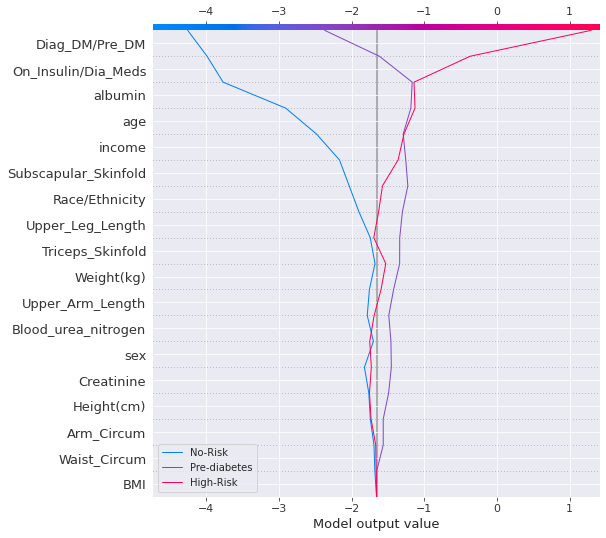

In [ ]:
shap.multioutput_decision_plot(expected_value.tolist(),
                   shap_values,  row_index = 10,features= features_display, legend_labels=["No-Risk","Pre-diabetes","High-Risk"]
                   
                   )

In [ ]:
multi_explainer = shap.TreeExplainer(model)
multi_shap_values = multi_explainer.shap_values(X_train)

In [ ]:
!pip install lime

In [ ]:
import lime
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['no-risk', 'pre-diabetic', 'Hight-risk'],
    mode='classification'
)

In [ ]:
y_test.iloc[10]

2

In [ ]:
exp = explainer.explain_instance(
    data_row=X_test.iloc[10], 
    predict_fn=model.predict_proba, top_labels=3)

exp.show_in_notebook(show_table=True)
exp.save_to_file('/tmp/temp.html')

In [ ]:
fig = exp.as_pyplot_figure()

fig.savefig('lime_report.jpg')

In [ ]:
exp = explainer.explain_instance(
    data_row=X_test.iloc[6], 
    predict_fn=model.predict_proba
)

exp.show_in_notebook(show_table=True)

In [ ]:
y_test.iloc[6]

1

In [ ]:
y_test.value_counts()[0]

1127

In [ ]:
print(m[0,0]/ y_test.value_counts()[0])
print(m[1,1]/ y_test.value_counts()[1])

print(m[2,2]/ y_test.value_counts()[2])



0.8961845607808341
0.7932564330079858
0.8811002661934338


In [ ]:
import io
from io import StringIO
from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz
xvar = X
feature_cols = xvar.columns
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1','2'])

from pydot import graph_from_dot_data
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [ ]:
names = ["No-risk","Pre-diabetic","High-risk"]

In [ ]:

!pip install graphviz 


In [ ]:
plt.savefig("graph.png")


<Figure size 432x288 with 0 Axes>

In [ ]:
graph.save()

In [ ]:
from lightgbm import plot_importance

plot_importance(model,figsize= (10,10))

In [ ]:
y_train.value_counts()

0    3389
2    3386
1    3365
Name: Diabetes_level, dtype: int64

In [ ]:
y_test.value_counts()

1    1127
2    1127
0    1127
Name: Diabetes_level, dtype: int64

In [ ]:
from sklearn.ensemble import StackingClassifier

model = StackingClassifier( estimators = [('rf', rf) ,('lgb',lgb),('knn',knn)], final_estimator= svc1 )


In [ ]:
from sklearn.ensemble import StackingClassifier

model = StackingClassifier( estimators = [('rf', rf) ,('lgb',lgb),('knn',knn)], final_estimator= svc1 )

X = df[cols]
y = df['Diabetes_level']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25,shuffle = True,stratify=y, random_state=42)


model.fit(X_train,y_train) 
y_pred = model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(confusion_matrix(y_train,model.predict(X_train)))
m = confusion_matrix(y_test,y_pred)

print(f1_score(y_train, model.predict(X_train), average = 'weighted'))
f1_score(y_test, y_pred, average = 'weighted')



NameError: ignored

In [ ]:
[[1072   40   15]
 [  33 1093    1]
 [  10    2 1115]]
[[3376    0    4]
 [   6 3374    0]
 [   1    1 3378]]
0.9988166406689887
0.9700966960117734

In [ ]:
!pip install lime

     |████████████████████████████████| 275 kB 4.3 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=36e4fafd4e3a4a01d4710f66bdfed033ee3ca48398909fcb29a52819a57b4a01
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [ ]:
print(m[0,0]/ y_test.value_counts()[0])
print(m[1,1]/ y_test.value_counts()[1])

print(m[2,2]/ y_test.value_counts()[2])


0.9698314108251996
0.9698314108251996
0.9858030168589175


In [ ]:
import lime

# Missing tratment

In [ ]:



cols_to_check = ['Upper_Leg_Length','Upper_Arm_Length','Arm_Circum','Waist_Circum','Triceps_Skinfold','Subscapular_Skinfold','albumin',
                 'Blood_urea_nitrogen','Creatinine','income']

data['all_null'] = data[cols_to_check].isnull().apply(lambda x: all(x), axis=1) 
data[data['all_null'] == True]

,sex,age,Race/Ethnicity,income,On_Insulin/Dia_Meds,Diag_DM/Pre_DM,Weight(kg),Height(cm),BMI,Upper_Leg_Length,Upper_Arm_Length,Arm_Circum,Waist_Circum,Triceps_Skinfold,Subscapular_Skinfold,Glycohemoglobin(%),albumin,Blood_urea_nitrogen,Creatinine,all_null


In [ ]:
data.corr()

In [ ]:
data.isnull().sum(axis = 1).value_counts().to_frame().reset_index().rename(columns = {'index':'Missing_cols_count',0:'Total_rows'}).set_index(['Missing_cols_count'])





,Total_rows
Missing_cols_count,
1,5343
2,931
3,230
7,140
4,75
5,34
8,25
6,11
10,6
